In [141]:
import matplotlib
from matplotlib import font_manager, rc
import platform

In [142]:
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

1. 임의의 두 수를 입력 받은 후 최소공배수/최대공약수 출력

In [64]:
a, b= input("두 수를 입력하세요 : ").split(",")
a = int(a)
b = int(b)

In [65]:
a_ = a
b_ = b

while True:
  a = a-b
  if b > a:
    a,b = b,a
  if a == b:
    break
print("최대공약수 : ",str(a))
print("최소공배수 : ",str(a_*b_/a))

최대공약수 :  10
최소공배수 :  840.0


2. 1~1000에서 각 숫자의 개수 구하기

    예로 10 ~ 15 까지의 각 숫자의 개수를 구해보자

    10 = 1, 0
    11 = 1, 1
    12 = 1, 2
    13 = 1, 3
    14 = 1, 4
    15 = 1, 5

    그러므로 이 경우의 답은 0:1개, 1:7개, 2:1개, 3:1개, 4:1개, 5:1개

In [86]:
from collections import Counter

In [88]:
c = []
for i in range(1,1001):
  c = c + list(str(i))
Counter(c)

Counter({'1': 301,
         '2': 300,
         '3': 300,
         '4': 300,
         '5': 300,
         '6': 300,
         '7': 300,
         '8': 300,
         '9': 300,
         '0': 192})

3.
    시저 암호는, 고대 로마의 황제 줄리어스 시저가 만들어 낸 암호인데, 
    예를 들어 알파벳 A를 입력했을 때, 그 알파벳의 n개 뒤에 오는
    (여기서는 예를 들 때 3으로 지정하였다)알파벳이 출력되는 것이다. 
    예를 들어 바꾸려는 단어가 'CAT"고, n을 5로 지정하였을 때 "HFY"가 되는 것이다.

    어떠한 암호를 만들 문장과 n을 입력했을 때 암호를 만들어 출력하는 프로그램을 
    작성해라.

In [99]:
sent = input("문자를 입력하세요 : ")
num = int(input("숫자를 입력하세요 : "))

In [112]:
sent = input("문자를 입력하세요 : ")
num = int(input("숫자를 입력하세요 : "))
after_sent = ""

for i in list(sent):
  cnum = ord(i) + num
  if 65 <= ord(i) <=90:
    if cnum > 90:
      cnum -= 26
  else:
    if cnum > 122:
      cnum -= 26
  after_sent = after_sent+chr(cnum)
print("변경 전 문장, 숫자 : ", sent,",",num)
print("암호 : ", after_sent)

변경 전 문장, 숫자 :  xyzXYZ , 5
암호 :  cdeCDE


In [121]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


4. http://matplotlib.org/gallery.html 에서
하나를 선택하여 타이타닉 데이터를 시각화 해본다

In [115]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


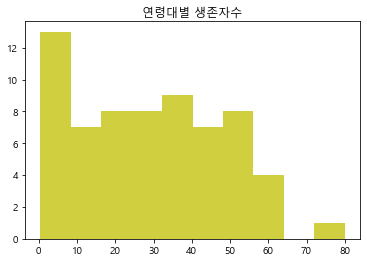

In [209]:
# 연령대별 생존자수
x = titanic[titanic["alive"] =="yes"]["age"].value_counts().keys()
plt.hist(x, bins = 10, histtype='bar', facecolor='y', alpha=0.75)
plt.title("연령대별 생존자수");

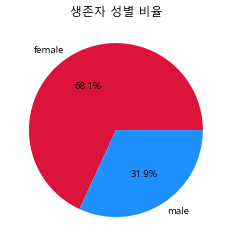

In [208]:
# 생존자 성별 비율

labels = list(titanic.groupby("sex").sum()["survived"].keys())
surv = list(titanic.groupby("sex").sum()["survived"].values)

plt.pie(surv, labels = labels, autopct = "%.1f%%", colors = ["crimson","dodgerblue"])
plt.title("생존자 성별 비율");

Text(0.5, 1.0, '성인 남성의 생존율')

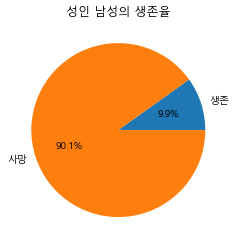

In [266]:
# 성인 남성의 생존율

labels = ["생존","사망"]
surv = [surv_adult_male, len(titanic)-surv_adult_male]

plt.pie(surv, labels = labels, autopct = "%.1f%%");
plt.title("성인 남성의 생존율")